<a href="https://colab.research.google.com/github/murilofarias10/Python/blob/main/data_exploration_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, with just a few lines of Python code, I explored my dataset and applied key statistics concepts!
sns.boxplot() from #Seaborn to analyze salary distributions
stats.probplot() from #Matplotlib to study data distribution
A correlation heatmap to visualize relationships between quantitative and qualitativies.

#Python #DataScience #Statistics #ExploratoryDataAnalysis #Seaborn #Matplotlib #LearningByDoing"*

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
# Load the dataset
new_data = pd.read_csv("/content/sample_data/dataset.csv")
# Display dataset information
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Idade                     500 non-null    int64  
 1   Salario                   450 non-null    float64
 2   Genero                    500 non-null    object 
 3   Escolaridade              500 non-null    object 
 4   Score_Exame_Psicotecnico  470 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 19.7+ KB


In [4]:
# Check for missing values in each column
print(new_data.isnull().sum())

Idade                        0
Salario                     50
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [5]:
# Identify negative salary values
new_data[new_data['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
94,20,-619.478622,Masculino,Médio,58.0
358,21,-2984.433215,Masculino,Médio,43.0
380,20,-3254.849042,Outro,Médio,50.0


In [6]:
# Replace negative salary values with None using LAMBDA
new_data['Salario'] = new_data['Salario'].apply(lambda x: x if x >= 0 else None)

In [7]:
# Verify if negative salaries still exist
new_data[new_data['Salario'] < 0]

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico


In [8]:
# Check for missing values again
print(new_data.isnull().sum())

Idade                        0
Salario                     53
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [ ]:
# Calculate the mean salary
media_salario = new_data['Salario'].mean()

# Replace missing salaries with the mean salary
new_data['Salario'].fillna(media_salario, inplace=True)

In [11]:
# Check for missing values after mean imputation
print(new_data.isnull().sum())

Idade                        0
Salario                      0
Genero                       0
Escolaridade                 0
Score_Exame_Psicotecnico    30
dtype: int64


In [ ]:
# Calculate the median of the psychotechnical exam scores
media_score = new_data['Score_Exame_Psicotecnico'].median()

# Replace missing exam scores with the median
new_data['Score_Exame_Psicotecnico'].fillna(media_score, inplace=True)

In [14]:
# Final missing values check
print(new_data.isnull().sum())

Idade                       0
Salario                     0
Genero                      0
Escolaridade                0
Score_Exame_Psicotecnico    0
dtype: int64


In [35]:
# Display a random sample of 10 rows
new_data.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico
353,65,40845.107626,Outro,Médio,40.0
35,22,21461.936378,Outro,Fundamental,48.0
483,51,22687.666121,Masculino,Fundamental,52.0
59,21,3462.681128,Masculino,Médio,47.0
61,61,29432.764241,Feminino,Superior,67.0
244,58,28669.601007,Feminino,Médio,80.0
274,43,25855.623517,Masculino,Médio,51.0
240,26,14298.612509,Feminino,Médio,58.0
50,26,15064.657271,Outro,Médio,72.0
357,42,19636.382151,Masculino,Fundamental,53.0


In [17]:
# Define intervals age group
faixas_etarias = [0, 25, 35, 45, 55, float('inf')]  #any age greater than 55 will fall into the last category

# Define labels for the age groups
rotulos_faixas = ["Menos de 25", "25-34", "35-44", "45-54", "55 ou mais"]

# Create the age group variable using pd.cut()
new_data['Faixa_Etaria'] = pd.cut(new_data['Idade'], bins = faixas_etarias, labels = rotulos_faixas)

In [28]:
# Display a random sample of 10 rows
new_data.sample(10)

,Idade,Salario,Genero,Escolaridade,Score_Exame_Psicotecnico,Faixa_Etaria
484,46,21410.761236,Outro,Médio,64.0,45-54
491,62,34103.360488,Outro,Fundamental,60.0,55 ou mais
447,41,22862.987412,Masculino,Médio,66.0,35-44
244,58,28669.601007,Feminino,Médio,80.0,55 ou mais
28,44,25409.764856,Masculino,Superior,91.0,35-44
225,35,21410.761236,Masculino,Médio,63.0,25-34
425,45,24495.680572,Feminino,Fundamental,61.0,35-44
338,65,27551.975899,Masculino,Superior,61.0,55 ou mais
212,51,30130.887738,Outro,Fundamental,39.0,45-54
54,33,21410.761236,Feminino,Médio,68.0,25-34


In [20]:
# Display dataset information again to confirm the changes
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Idade                     500 non-null    int64   
 1   Salario                   500 non-null    float64 
 2   Genero                    500 non-null    object  
 3   Escolaridade              500 non-null    object  
 4   Score_Exame_Psicotecnico  500 non-null    float64 
 5   Faixa_Etaria              500 non-null    category
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 20.4+ KB


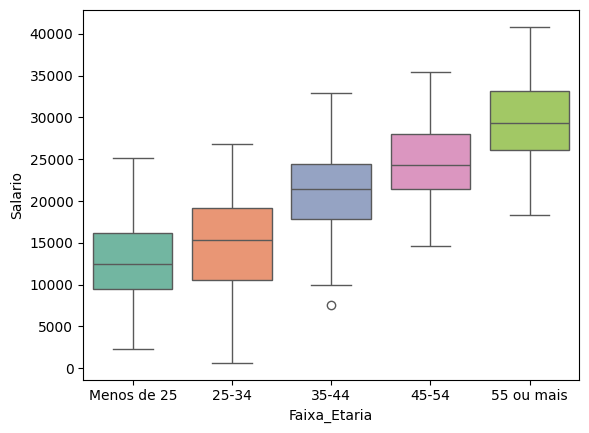

In [21]:
# Boxplot: Distribution of age group by salaries
# Boxplots
#FROM matplotlib

sns.boxplot(
    x = 'Faixa_Etaria',
    y = 'Salario',
    data = new_data,
    palette='Set2',
    hue ='Faixa_Etaria',
    legend=False)
plt.show()

In [29]:
# Analyze the distribution of psychotechnical exam scores
sce = new_data['Score_Exame_Psicotecnico']
see_salario = new_data['Salario']

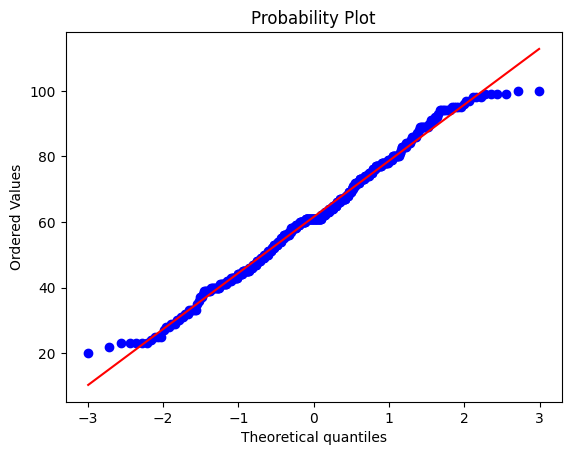

In [30]:
# Analyze the distribution of salaries
#FROM Matplotlib
stats.probplot(sce, dist="norm", plot=plt)
plt.show()

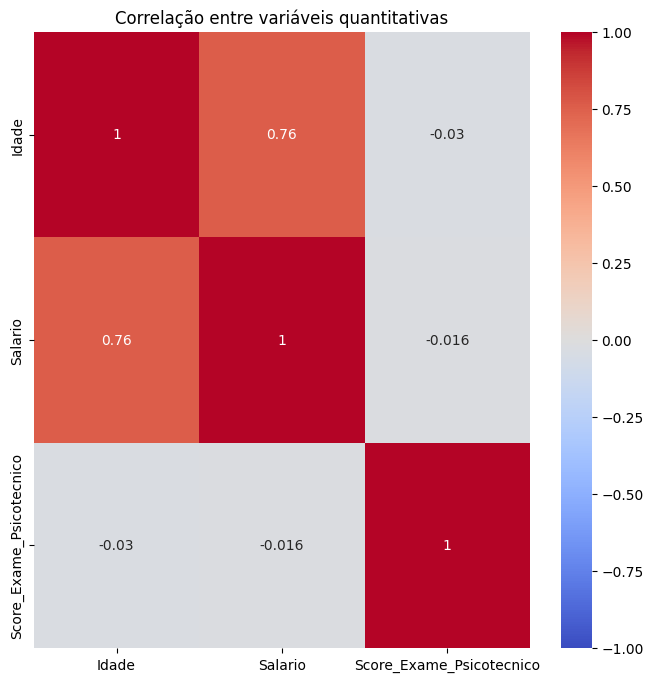

In [31]:
# Calculate the correlation between selected quantitative variables
correlation = new_data[  ['Idade', 'Salario', 'Score_Exame_Psicotecnico']  ].corr()

# Visualize the correlation matrix with a heatmap
#FROM SEABORN

plt.figure(figsize = (8, 8))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlação entre variáveis quantitativas')
plt.show()